In [51]:
import os
import json
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [52]:
def intent(annotation_path):
    frame = np.zeros((1440, 2560, 3), dtype=np.uint8)
    
    with open(annotation_path, "r") as f:
        label_data = json.load(f)
    
    for line in label_data["Lines"]:
        print(len(line))
        points = [(float(p["x"]), float(p["y"])) for p in line]
        for point in points:
            cv2.circle(frame, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)      
        return points, frame

In [53]:
annotation_path = "/Users/danielserranodominguez/Desktop/Segmentor/Curvelanes/valid/labels/0a0d988cfa3c35dc6a7f90135c591148.lines.json"

9
[(2030.5, 1439.0), (1963.1, 1388.21), (1895.71, 1337.41), (1828.32, 1286.62), (1760.92, 1235.82), (1760.52, 1235.52), (1395.47, 960.35), (1369.11, 939.41), (1324.93, 892.12)]


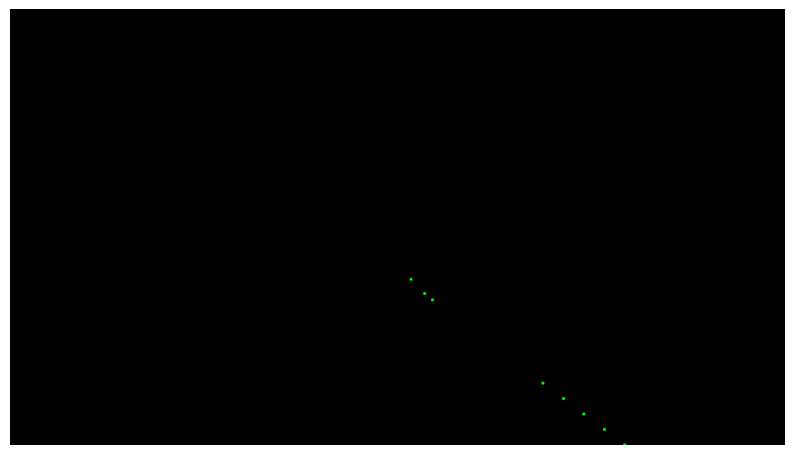

In [54]:
points, frame = intent(annotation_path)
print(points)

# Convertir BGR a RGB para visualizar correctamente en Matplotlib
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Mostrar la imagen en el notebook
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.axis("off")  # Ocultar los ejes
plt.show()

In [55]:
# Convertir a arrays de numpy
points = sorted(points, key=lambda p: p[1])  # Ordenar por y
x = np.array([p[0] for p in points]).reshape(-1, 1)  # X debe ser columna
y = np.array([p[1] for p in points])  # Y es el eje dependiente

# Crear el modelo de regresión polinomial de grado 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(y.reshape(-1, 1))  # Expandir características
model = LinearRegression().fit(X_poly, x)  # Ajustar el modelo

# Generar puntos suavizados para la curva ajustada
y_pred = np.linspace(min(y), max(y), 300)  # Rango de Y
X_pred_poly = poly.transform(y_pred.reshape(-1, 1))  # Transformar Y
x_pred = model.predict(X_pred_poly)  # Predicción de X

/var/folders/3s/37jkw0rj5394ttlzwg3zhb3w0000gn/T/ipykernel_81228/2184576785.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1, y1 = int(x_pred[i]), int(y_pred[i])
/var/folders/3s/37jkw0rj5394ttlzwg3zhb3w0000gn/T/ipykernel_81228/2184576785.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2, y2 = int(x_pred[i + 1]), int(y_pred[i + 1])


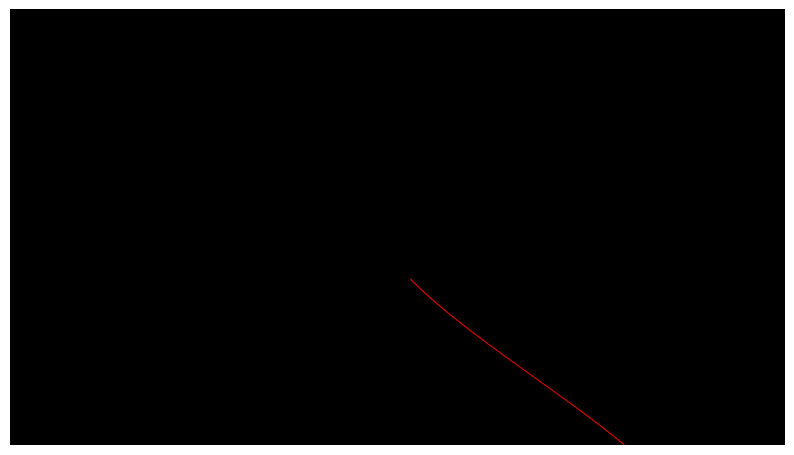

In [56]:
# Crear imagen negra de dimensiones 2560x1440
img = np.zeros((1440, 2560, 3), dtype=np.uint8)

# Dibujar los puntos originales
for point in points:
    cv2.circle(frame, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)      

# Dibujar la línea ajustada
for i in range(len(y_pred) - 1):
    x1, y1 = int(x_pred[i]), int(y_pred[i])
    x2, y2 = int(x_pred[i + 1]), int(y_pred[i + 1])
    if 0 <= x1 < 2560 and 0 <= y1 < 1440 and 0 <= x2 < 2560 and 0 <= y2 < 1440:
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Rojo

# Convertir BGR a RGB para Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen en Jupyter
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [57]:
# Obtener los coeficientes y el término independiente
a, b, c, d = model.coef_[0, 3], model.coef_[0, 2], model.coef_[0, 1], model.intercept_[0]

# Imprimir la ecuación resultante
print(f"x = {a:.6f} y³ + {b:.6f} y² + {c:.6f} y + {d:.6f}")

x = -0.000001 y³ + 0.004715 y² + -4.338621 y + 2357.888350


9


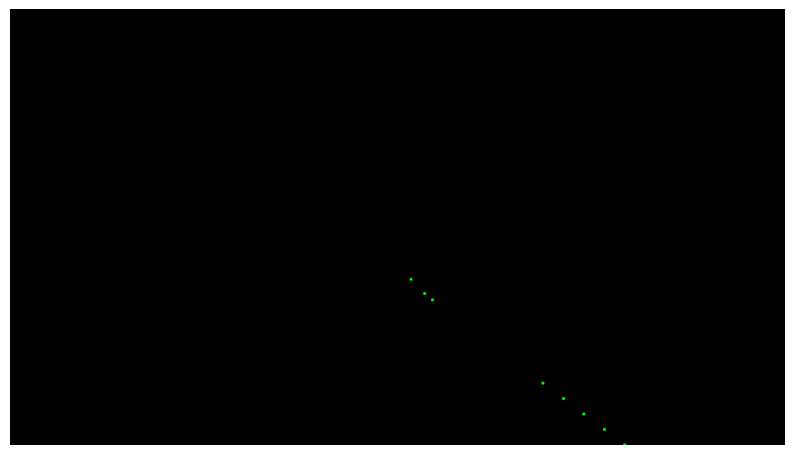

In [58]:
points, _ = intent(annotation_path)

# Convertir BGR a RGB para visualizar correctamente en Matplotlib
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

for point in points:
    cv2.circle(frame, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)
    
# Mostrar la imagen en el notebook
plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.axis("off")  # Ocultar los ejes
plt.show()

In [59]:
# Dimensiones de la imagen (ajústalas según tu caso)
img_height = 1440  # Altura de la imagen (máximo valor de y)
img_width = 2560   # Ancho de la imagen

9
y = 0.000000 x³ + -0.002594 x² + 5.211138 x + -2613.791322


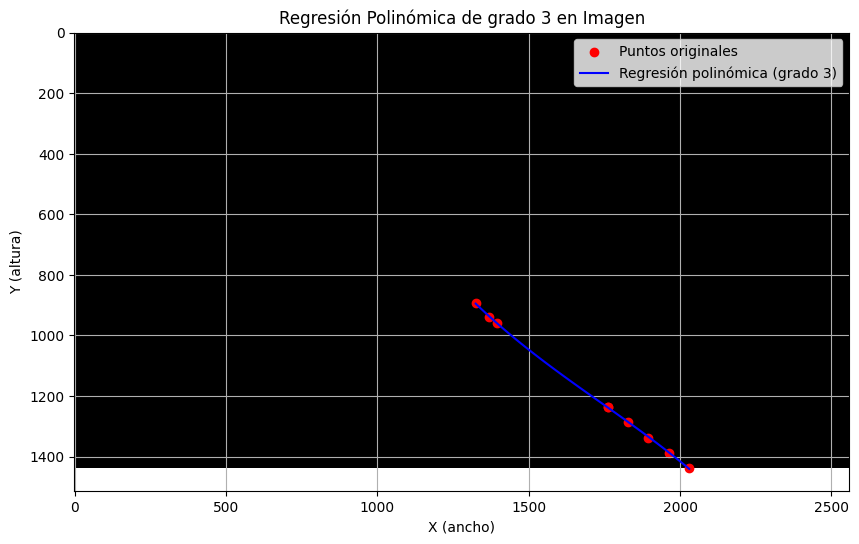

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Dimensiones de la imagen
img_height = 1440  
img_width = 2560

# Puntos en el sistema de coordenadas de la imagen (y ya está invertida)
points, _ = intent(annotation_path)

# Convertir a arrays de NumPy
x = np.array([p[0] for p in points]).reshape(-1, 1)  
y = np.array([p[1] for p in points]).reshape(-1, 1)  

# Ajuste polinómico (grado 3)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Modelo de regresión polinómica
model = LinearRegression()
model.fit(x_poly, y)

# Obtener coeficientes del modelo
a, b, c, d = model.coef_[0, 3], model.coef_[0, 2], model.coef_[0, 1], model.intercept_[0]
print(f"y = {a:.6f} x³ + {b:.6f} x² + {c:.6f} x + {d:.6f}")

# Predicción para graficar
x_pred = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(x_pred))

# Convertir BGR a RGB para visualizar correctamente en Matplotlib
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Dibujar en un fondo negro
plt.figure(figsize=(10, 6))
plt.imshow(frame)  # Fondo negro
plt.scatter(x, y, color='red', label="Puntos originales")   # Puntos en rojo
plt.plot(x_pred, y_pred, color='blue', label="Regresión polinómica (grado 3)")  # Curva en azul
plt.xlabel("X (ancho)")
plt.ylabel("Y (altura)")
plt.legend()
plt.title("Regresión Polinómica de grado 3 en Imagen")
plt.grid()
plt.show()

In [61]:
annotation_path = "/Users/danielserranodominguez/Desktop/Segmentor/Curvelanes/valid/labels/0a0d988cfa3c35dc6a7f90135c591148.lines.json"
image_path = "/Users/danielserranodominguez/Desktop/Segmentor/Curvelanes/valid/images/0a0d988cfa3c35dc6a7f90135c591148.jpg"

In [92]:
import numpy as np
import cv2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def fit_polynomial(points, degree, frame):
    """Ajusta un polinomio de grado 'degree' a los puntos (x, y) y dibuja en la imagen con OpenCV."""
    
    # Convertir a arrays de NumPy
    x = np.array([p[0] for p in points]).reshape(-1, 1)  
    y = np.array([p[1] for p in points]).reshape(-1, 1) 

    # Ajuste polinómico (grado especificado)
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Modelo de regresión polinómica
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtener coeficientes del modelo
    a, b, c, d = model.coef_[0, -1], model.coef_[0, -2], model.coef_[0, -3], model.intercept_[0]
    # print(f"y = {a:.6f} x³ + {b:.6f} x² + {c:.6f} x + {d:.6f}")

    x_min, x_max = int(min(x).item()), int(max(x).item())
    dy = int((max(y) - min(y)).item())  # Diferencia de altura de la línea

    # Predicción para graficar
    x_pred = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    y_pred = model.predict(poly.transform(x_pred))

    # Convertir y_pred a enteros para dibujar en la imagen
    x_pred = x_pred.flatten().astype(int)
    y_pred = y_pred.flatten().astype(int)

    # Dibujar los puntos originales en la imagen
    for point in points:
        #cv2.circle(frame, (px, py), 5, (0, 0, 255), -1)  # Rojo
        cv2.circle(frame, (int(point[0]), int(point[1])), 5, (0, 255, 0), 5)

    # Dibujar la línea de regresión en la imagen
    for i in range(len(x_pred) - 1):
        pt1 = (x_pred[i], y_pred[i])
        pt2 = (x_pred[i + 1], y_pred[i + 1])
        cv2.line(frame, pt1, pt2, (255, 0, 0), 2)  # Azul

    return a, b, c, d, x_min, x_max, dy, frame  # Devolver la imagen con la regresión dibujada

In [93]:
# def fit_polynomial__(points, degree):
#     """Ajusta un polinomio de grado 'degree' a los puntos (x, y)."""
#     # points = sorted(points, key=lambda p: p[1])  # Ordenar por y ascendente
#     # Convertir a arrays de NumPy
#     x = np.array([p[0] for p in points]).reshape(-1, 1)  
#     y = np.array([p[1] for p in points]).reshape(-1, 1) 

#     # Ajuste polinómico (grado 3)
#     poly = PolynomialFeatures(degree=degree)
#     x_poly = poly.fit_transform(x)

#     # Modelo de regresión polinómica
#     model = LinearRegression()
#     model.fit(x_poly, y)

#     # Obtener coeficientes del modelo
#     a, b, c, d = model.coef_[0, 3], model.coef_[0, 2], model.coef_[0, 1], model.intercept_[0]
#     print(f"y = {a:.6f} x³ + {b:.6f} x² + {c:.6f} x + {d:.6f}")

#     x_min, x_max = min(x), max(x)
    
#     dy = max(y) - min(y)  # Diferencia de altura de la línea
    
#     # Predicción para graficar
#     x_pred = np.linspace(x_min, x_max, 100).reshape(-1, 1)
#     y_pred = model.predict(poly.transform(x_pred))

#     # Convertir BGR a RGB para visualizar correctamente en Matplotlib
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#     # Dibujar en un fondo negro
#     plt.figure(figsize=(10, 6))
#     plt.imshow(frame)  # Fondo negro
#     plt.scatter(x, y, color='red', label="Puntos originales")   # Puntos en rojo
#     plt.plot(x_pred, y_pred, color='blue', label="Regresión polinómica (grado 3)")  # Curva en azul
#     plt.xlabel("X (ancho)")
#     plt.ylabel("Y (altura)")
#     plt.legend()
#     plt.title("Regresión Polinómica de grado 3 en Imagen")
#     plt.grid()
#     plt.show()

#     return a, b, c, d, x_min, x_max, dy, frame

In [109]:
# image = intent(image_path, annotation_path)
# # Convertir BGR a RGB para Matplotlib
# img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Mostrar imagen en Jupyter
# plt.figure(figsize=(10, 6))
# plt.imshow(img_rgb)
# plt.axis("off")
# plt.show()

In [114]:
import numpy as np
import cv2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def fit_polynomial(points, degree, frame):
    """Ajusta un polinomio de grado 'degree' a los puntos (x, y) y dibuja en la imagen con OpenCV."""
    
    # Convertir a arrays de NumPy
    x = np.array([p[0] for p in points]).reshape(-1, 1)  
    y = np.array([p[1] for p in points]).reshape(-1, 1) 

    model = LinearRegression()
    
    if degree == 1:
        # Regresión lineal simple
        x_poly = x  
    else:
        # Ajuste polinómico (grado especificado)
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(x)

    # Ajustar el modelo
    model.fit(x_poly, y)

    # Obtener coeficientes del modelo
    if degree == 1:
        c = model.coef_[0, 0]  # Pendiente
        d = model.intercept_[0]  # Intersección
        a, b = 0, 0  # No hay términos cúbicos ni cuadráticos
    else:
        a, b, c, d = model.coef_[0, -1], model.coef_[0, -2], model.coef_[0, -3], model.intercept_[0]

    # Definir rango de predicción
    x_min, x_max = int(min(x).item()), int(max(x).item())
    dy = int((max(y) - min(y)).item())  # Diferencia de altura de la línea

    # Predicción para graficar
    x_pred = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    if degree == 1:
        y_pred = model.predict(x_pred)
    else:
        y_pred = model.predict(poly.transform(x_pred))

    # Convertir y_pred a enteros para dibujar en la imagen
    x_pred = x_pred.flatten().astype(int)
    y_pred = y_pred.flatten().astype(int)

    # Dibujar los puntos originales en la imagen
    for point in points:
        cv2.circle(frame, (int(point[0]), int(point[1])), 5, (0, 255, 0), 5)

    # Dibujar la línea de regresión en la imagen
    for i in range(len(x_pred) - 1):
        pt1 = (x_pred[i], y_pred[i])
        pt2 = (x_pred[i + 1], y_pred[i + 1])
        cv2.line(frame, pt1, pt2, (255, 0, 0), 2)  # Azul

    return a, b, c, d, x_min, x_max, dy, frame  # Devolver la imagen con la regresión dibujada

In [115]:
def intent(image_path, annotation_path, grid_size=7, degree=3, B=2):
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    
    with open(annotation_path, "r") as f:
        label_data = json.load(f)
        
    for line in label_data["Lines"]:
        # print(len(line))
        points = [(float(p["x"]), float(p["y"])) for p in line]
        for point in points:
            cv2.circle(image, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)
        
        if len(line) > 2:
            a, b, c, d, x_min, x_max, dy, image = fit_polynomial(points, degree, image)
        else:
            a, b, c, d, x_min, x_max, dy, image = fit_polynomial(points, 1, image)

        # print(a, b, c, d, x_min, x_max, dy)
    
    return image

In [116]:
annotations_path = "/Users/danielserranodominguez/Desktop/Segmentor/Curvelanes/valid/labels"
images_path = "/Users/danielserranodominguez/Desktop/Segmentor/Curvelanes/valid/images"

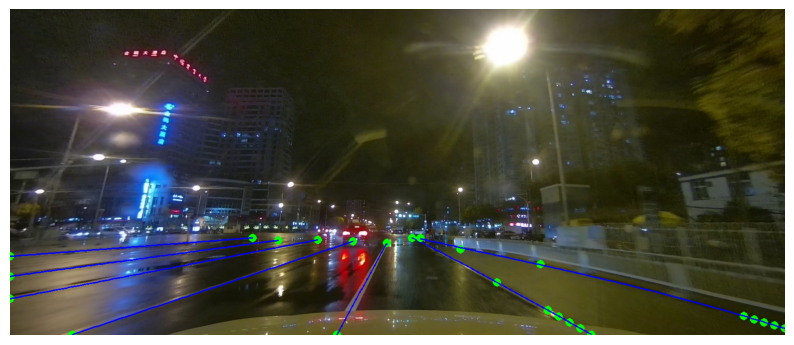

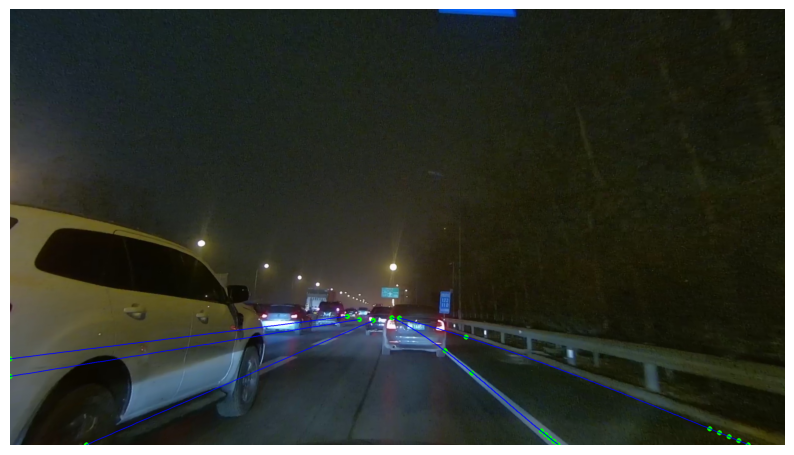

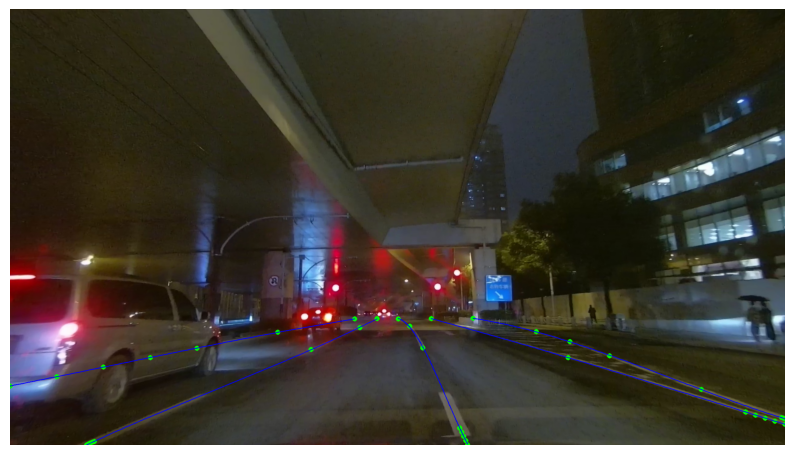

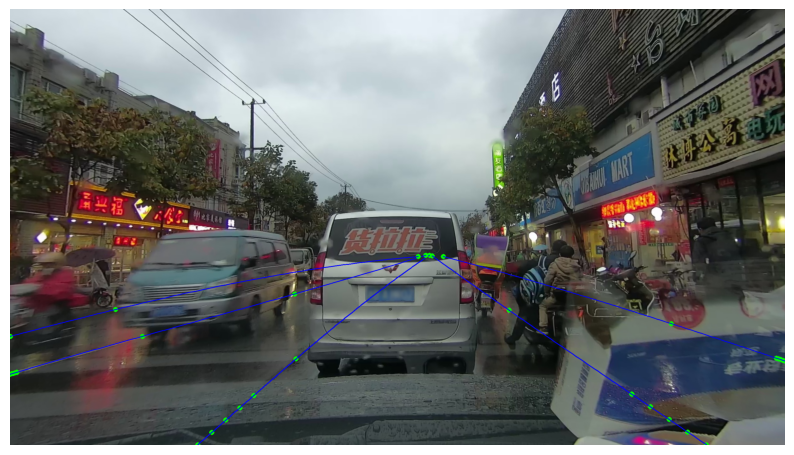

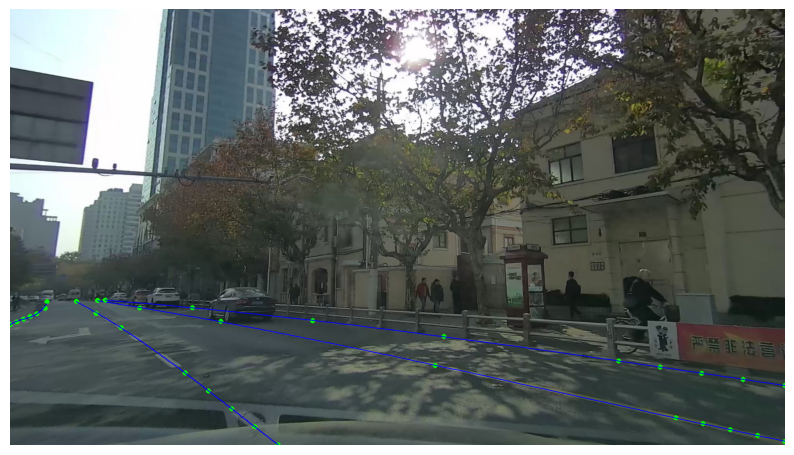

In [117]:
i = 0
for annot_name in os.listdir(annotations_path):
    annotation_path = os.path.join(annotations_path, annot_name)
    image_path = annotation_path.replace("labels", "images").replace(".lines.json", ".jpg")

    image = intent(image_path, annotation_path)
    if i == 5:
        break
    #cv2.imwrite(image_path.replace("images", "output"), image)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Mostrar imagen en Jupyter
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()
    i=i+1